# Housing Prices Prediction using Machine Learning

### 1. Importing libraries

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Reading the dataset

In [5]:
dfa = pd.read_csv('pricepaid.csv')

In [6]:
dfa.shape

(27450499, 11)

In [7]:
df = dfa.sample(n = 500000, random_state = 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 3529864 to 12699276
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Transaction unique identifier  500000 non-null  object
 1   Price                          500000 non-null  int64 
 2   Date of Transfer               500000 non-null  object
 3   Property Type                  500000 non-null  object
 4   Old/New                        500000 non-null  object
 5   Duration                       500000 non-null  object
 6   Town/City                      500000 non-null  object
 7   District                       500000 non-null  object
 8   County                         500000 non-null  object
 9   PPDCategory Type               500000 non-null  object
 10  Record Status                  500000 non-null  object
dtypes: int64(1), object(10)
memory usage: 45.8+ MB


In [9]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status
3529864,{E6089F5E-E617-4FAC-A41F-5A249F1A750D},76000,1998-11-02 00:00,T,N,F,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,A,A
17475064,{0B87DD3C-39E1-4FA0-B659-7F407EC9E1E2},465000,2011-10-28 00:00,D,N,F,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,A,A
7902971,{8089D38E-3019-4A39-9155-46D5C526D630},175750,2002-10-04 00:00,D,N,F,ALDEBURGH,SUFFOLK COASTAL,SUFFOLK,A,A
21587209,{3B7E0B90-69B1-EA99-E050-A8C062057E77},293000,2016-04-12 00:00,F,N,L,LONDON,CROYDON,GREATER LONDON,A,A
3956496,{7F6D0585-AC3E-41F2-8D95-8E9052FA3C6F},173000,1999-06-30 00:00,D,N,F,WOKINGHAM,WOKINGHAM,WOKINGHAM,A,A


In [10]:
df.shape

(500000, 11)

There are 27 million rows and 11 columns in the dataset

### 3. Data Cleaning

In [11]:
df.isnull().sum()

Transaction unique identifier    0
Price                            0
Date of Transfer                 0
Property Type                    0
Old/New                          0
Duration                         0
Town/City                        0
District                         0
County                           0
PPDCategory Type                 0
Record Status                    0
dtype: int64

Here we can observe that there are no null values in any of the columns. So we don't need to perform further steps for handling null values.

* Dropping unwanted columns
    - Transation unique identifier : Not co-related with the price column
    - PPD Category Type : It is similar to duration column.
    - Record Status : It contains monthly file only Indicates additions, changes and deletions to the records so not necessary.

In [12]:
df.drop(columns = 'Transaction unique identifier', axis = 1, inplace = True)
df.drop(columns = 'PPDCategory Type', axis = 1, inplace = True)
df.drop(columns = 'Record Status', axis = 1, inplace = True)

In [13]:
df.head()

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County
3529864,76000,1998-11-02 00:00,T,N,F,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE
17475064,465000,2011-10-28 00:00,D,N,F,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT
7902971,175750,2002-10-04 00:00,D,N,F,ALDEBURGH,SUFFOLK COASTAL,SUFFOLK
21587209,293000,2016-04-12 00:00,F,N,L,LONDON,CROYDON,GREATER LONDON
3956496,173000,1999-06-30 00:00,D,N,F,WOKINGHAM,WOKINGHAM,WOKINGHAM


In [14]:
#importing datetime library
from datetime import datetime

In [15]:
df['Year'] = df['Date of Transfer'].str[:4]

In [16]:
df['Date of Transfer'] = [x[:11] for x in df['Date of Transfer']]

In [17]:
df['Month'] = df['Date of Transfer'].str[5:7]

In [18]:
df.head()

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,Year,Month
3529864,76000,1998-11-02,T,N,F,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,1998,11
17475064,465000,2011-10-28,D,N,F,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,2011,10
7902971,175750,2002-10-04,D,N,F,ALDEBURGH,SUFFOLK COASTAL,SUFFOLK,2002,10
21587209,293000,2016-04-12,F,N,L,LONDON,CROYDON,GREATER LONDON,2016,04
3956496,173000,1999-06-30,D,N,F,WOKINGHAM,WOKINGHAM,WOKINGHAM,1999,06


In [19]:
df.tail()

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,Year,Month
9319733,130000,2003-12-19,T,N,F,HARLOW,HARLOW,ESSEX,2003,12
3095738,210000,1998-06-11,D,Y,F,SALTASH,CARADON,CORNWALL,1998,06
452418,43000,1995-06-26,T,N,F,LOWESTOFT,WAVENEY,SUFFOLK,1995,06
20589667,280000,2015-10-14,T,N,L,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,2015,10
12699276,165000,2006-08-11,T,N,F,DARTFORD,DARTFORD,KENT,2006,08


In [20]:
df[df['Property Type'] == 'O'].count()

Price               7333
Date of Transfer    7333
Property Type       7333
Old/New             7333
Duration            7333
Town/City           7333
District            7333
County              7333
Year                7333
Month               7333
dtype: int64

Property type O is very less as compared to other property types, so we can drop it.

In [21]:
df = df[df['Property Type'] != 'O'].copy()

# EDA

### Number of cities, districts and counties.

In [22]:
print('Number of Cities:', df['Town/City'].nunique())
print('Number of Districts:', df['District'].nunique())
print('Number of Counties:', df['County'].nunique())

Number of Cities: 1163
Number of Districts: 458
Number of Counties: 130


In [23]:
df['Year'].nunique()

28

- List of new investements that were done in 2021

In [24]:
df_2021 = df[df['Year'] == '2021'].copy()

df_2021['Month'] = df_2021['Date of Transfer'].str[5:7].astype(int)

df_2021_price_per_month = df_2021.groupby(['Property Type','Month'], as_index=False)['Price'].median()

In [25]:
df_2021['Month'] = df_2021['Month'].astype(int)

- Distribution of investments done in the year 2021 by Property Type

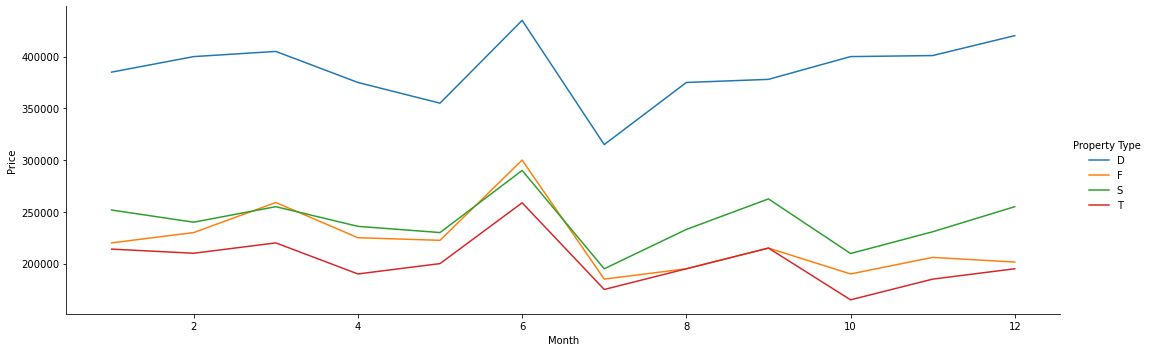

In [26]:
sns.relplot(kind='line', data = df_2021_price_per_month, x = 'Month', y = 'Price', hue = 'Property Type', aspect = 3)

## Data Cleaning Part - 2

In [27]:
df.drop(columns = 'Date of Transfer', axis = 1, inplace = True)

In [28]:
df.head()

,Price,Property Type,Old/New,Duration,Town/City,District,County,Year,Month
3529864,76000,T,N,F,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,1998,11
17475064,465000,D,N,F,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,2011,10
7902971,175750,D,N,F,ALDEBURGH,SUFFOLK COASTAL,SUFFOLK,2002,10
21587209,293000,F,N,L,LONDON,CROYDON,GREATER LONDON,2016,04
3956496,173000,D,N,F,WOKINGHAM,WOKINGHAM,WOKINGHAM,1999,06


### Applying One-Hot Encoder 
0 for No(OLD), 1 for Yes(NEW)

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['Old/New'])

df['Old/New'] = le.transform(df['Old/New'])

df.head()


,Price,Property Type,Old/New,Duration,Town/City,District,County,Year,Month
3529864,76000,T,0,F,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,1998,11
17475064,465000,D,0,F,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,2011,10
7902971,175750,D,0,F,ALDEBURGH,SUFFOLK COASTAL,SUFFOLK,2002,10
21587209,293000,F,0,L,LONDON,CROYDON,GREATER LONDON,2016,04
3956496,173000,D,0,F,WOKINGHAM,WOKINGHAM,WOKINGHAM,1999,06


In [30]:
enc_df = pd.DataFrame(df, columns = ['Property Type'])

dum_df = pd.get_dummies(df, columns = ["Property Type"], prefix = ["Property_Type_is_"] )

df2 = enc_df.join(dum_df)

df2.drop(columns = 'Property Type', axis = 1, inplace = True)

df2.head()

,Price,Old/New,Duration,Town/City,District,County,Year,Month,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
3529864,76000,0,F,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,1998,11,0,0,0,1
17475064,465000,0,F,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,2011,10,1,0,0,0
7902971,175750,0,F,ALDEBURGH,SUFFOLK COASTAL,SUFFOLK,2002,10,1,0,0,0
21587209,293000,0,L,LONDON,CROYDON,GREATER LONDON,2016,04,0,1,0,0
3956496,173000,0,F,WOKINGHAM,WOKINGHAM,WOKINGHAM,1999,06,1,0,0,0


- Check is <code>Price</code> records skewed

In [31]:
df2["Price"].skew()

20.63591592347932

np.log is used to convert the values in price column to Natural log so that the boxplot is easy to read.

In [32]:
log_transform_price = np.log(df2["Price"])

df2['Price'] = log_transform_price

print('New skewness:', log_transform_price.skew())

New skewness: -0.07999587752512069


<AxesSubplot:xlabel='Price'>

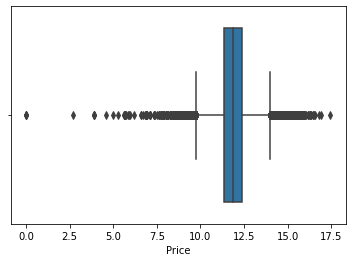

In [33]:
sns.boxplot(data = df2, x = 'Price')

We can see that many outliers are present in the Price column. So we need to deal with the outliers.

Initialize outliers boundaries

In [34]:
lower = 10.0
higher = 13.5

In [35]:
price_outliers_below = df2.loc[df2['Price'] < lower]
price_outliers_abow = df2.loc[df2['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_abow['Price'].count(), "entries having 'Price' value greater than", higher)

6177 entries having 'Price' value lower than  10.0
10087 entries having 'Price' value greater than 13.5


In [36]:
df2["Price"] = df2["Price"].apply(lambda x: lower if x < lower else x)

df2["Price"] = df2["Price"].apply(lambda x: higher if x > higher else x)

In [37]:
price_outliers_below = df2.loc[df2['Price'] < lower]
price_outliers_abow = df2.loc[df2['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_abow['Price'].count(), "entries having 'Price' value greater than ", higher)

0 entries having 'Price' value lower than  10.0
0 entries having 'Price' value greater than  13.5


- Price distribution after dealing with outliers


<AxesSubplot:xlabel='Price'>

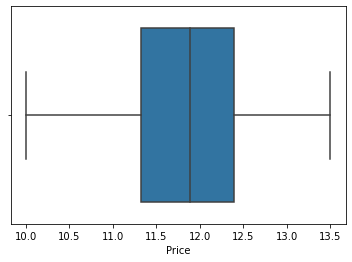

In [38]:
sns.boxplot(data = df2, x = 'Price')

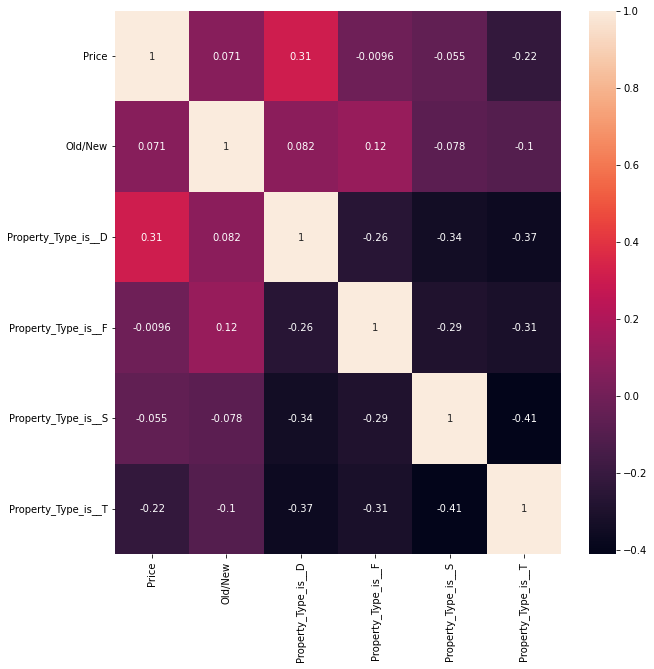

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2[df2.corr().index].corr(), annot = True)
plt.show()

In [40]:
#Describe Price Column
df2.Price.describe()

count    492667.000000
mean         11.853637
std           0.774437
min          10.000000
25%          11.326596
50%          11.884489
75%          12.388394
max          13.500000
Name: Price, dtype: float64

### 4.1. Prepare data for Linear Regression

In [41]:
lin_df = df2.copy()

lin_df.head()

,Price,Old/New,Duration,Town/City,District,County,Year,Month,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
3529864,11.238489,0,F,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,1998,11,0,0,0,1
17475064,13.049793,0,F,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,2011,10,1,0,0,0
7902971,12.076818,0,F,ALDEBURGH,SUFFOLK COASTAL,SUFFOLK,2002,10,1,0,0,0
21587209,12.587928,0,L,LONDON,CROYDON,GREATER LONDON,2016,04,0,1,0,0
3956496,12.061047,0,F,WOKINGHAM,WOKINGHAM,WOKINGHAM,1999,06,1,0,0,0


- Encode other categorical data

In [42]:
lin_df['Town/City'] = lin_df['Town/City'].factorize()[0].astype('float32')
lin_df['District'] = lin_df['District'].factorize()[0].astype('float32')
lin_df['County'] = lin_df['County'].factorize()[0].astype('float32')

lin_df

,Price,Old/New,Duration,Town/City,District,County,Year,Month,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
3529864,11.238489,0,F,0.0,0.0,0.0,1998,11,0,0,0,1
17475064,13.049793,0,F,1.0,1.0,1.0,2011,10,1,0,0,0
7902971,12.076818,0,F,2.0,2.0,2.0,2002,10,1,0,0,0
21587209,12.587928,0,L,3.0,3.0,3.0,2016,04,0,1,0,0
3956496,12.061047,0,F,4.0,4.0,4.0,1999,06,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9319733,11.775290,0,F,374.0,304.0,34.0,2003,12,0,0,0,1
3095738,12.254863,1,F,584.0,198.0,24.0,1998,06,1,0,0,0
452418,10.668955,0,F,27.0,31.0,2.0,1995,06,0,0,0,1
20589667,12.542545,0,L,49.0,54.0,38.0,2015,10,0,0,0,1


- Seggregate independent variables

In [43]:
feat_cols = ['District', 'County', 'Old/New', 'Year', 'Month', "Town/City","Property_Type_is__D", "Property_Type_is__F", 
           'Property_Type_is__S', 'Property_Type_is__T']

- Divide variables to dependent and independent

In [44]:
X = lin_df[feat_cols]
y = lin_df['Price']

#### Splitting Data into training and testing

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

- Rescale variables via standardization

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_array = scaler.fit_transform(X_train[feat_cols])
normalized_X_train = pd.DataFrame(normalized_array, columns=feat_cols)

normalized_X_train

,District,County,Old/New,Year,Month,Town/City,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
0,-0.879451,-0.714470,-0.340915,1.699886,0.372177,-0.139556,-0.553686,-0.471997,-0.621940,1.512201
1,-0.087740,0.314469,-0.340915,1.446415,0.670527,-0.975533,-0.553686,-0.471997,1.607873,-0.661288
2,1.195378,2.305962,-0.340915,1.192944,1.565576,1.274888,-0.553686,-0.471997,1.607873,-0.661288
3,0.267165,-0.382554,-0.340915,-1.468500,-1.119573,1.517471,1.806079,-0.471997,-0.621940,-0.661288
4,-0.761149,-0.913619,-0.340915,-0.201145,1.267226,-1.005389,-0.553686,-0.471997,-0.621940,1.512201
...,...,...,...,...,...,...,...,...,...,...
369495,0.840473,-0.050639,-0.340915,-1.595235,1.565576,0.196328,-0.553686,-0.471997,1.607873,-0.661288
369496,0.794972,-0.117022,-0.340915,-0.074410,0.372177,-0.012666,-0.553686,-0.471997,-0.621940,1.512201
369497,-1.234356,-0.946811,-0.340915,-0.074410,-1.119573,-0.930748,-0.553686,-0.471997,-0.621940,1.512201
369498,0.312665,1.708514,-0.340915,0.939473,-1.119573,1.842158,-0.553686,-0.471997,-0.621940,1.512201


- Summarize the shape of the training dataset

In [47]:
print(X_train.shape, y_train.shape)

(369500, 10) (369500,)


### Apply linear regression, fit the model and 5-fold cross-validation

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
# Applying linear regression
from sklearn.linear_model import LinearRegression

# Creating an instance for the model
lr_model = LinearRegression(n_jobs = -1)

In [51]:
lr_model.fit(normalized_X_train, y_train)

LinearRegression(n_jobs=-1)

In [52]:
lr_model.score(normalized_X_train, y_train)

0.4615614249956158

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [54]:
kf = KFold(n_splits = 5, random_state = None)
lreg = LinearRegression()
avg_lreg_score = cross_val_score(lreg , normalized_X_train, y_train, cv = kf)

In [55]:
print('Avg accuracy : {}'.format(avg_lreg_score))

Avg accuracy : [0.4597294  0.4601159  0.46174842 0.46362928 0.46200494]


### Apply decision tree, fit the model and 5-fold cross-validation

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
kf = KFold(n_splits = 5, random_state = None)

tr_regressor = DecisionTreeRegressor(random_state = 0)

avg_tr_score = cross_val_score(tr_regressor, normalized_X_train, y_train, cv = kf)

In [58]:
print('Avg accuracy : {}'.format(avg_tr_score))

Avg accuracy : [0.58155233 0.58243832 0.58165831 0.58055343 0.58460296]


In [59]:
y_true = np.exp(y_train)
y_pred = np.exp(lr_model.predict(normalized_X_train))

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred, squared = False)

124092.35515678643

In [61]:
tr_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [71]:
dt_y_pred = tr_regressor.predict(X_test)

### Prediction using Decision Tree

In [64]:
user = tr_regressor.predict([[72,14,0,'2021','08',241,0,0,0,1]])

In [65]:
user

array([11.91109962])

In [67]:
np.exp(user)

array([148910.3348082])